## Step 1: Load DAVIS Semantics JSON and Classify Sequences

#### This code loads davis_semantics.json and separates the sequence into two directiories—one for sequences with a single object and one for sequences with multiple objects

#### PT.2 Deriving Bounding Boxes: Binary Masks on Grayscaled Single-Object Sequences

In [4]:
# Checking the graysclae value of the masks to choose the threshold at which the mask should become white
import cv2
import numpy as np
from pathlib import Path

# Define the root folder where your grayscale masks are stored.
# Adjust this path if necessary.
grayscale_dir = Path("output") / "grayscale_single_object_masks"

# Iterate over each sequence folder and then over each image file in those folders.
for sequence_folder in grayscale_dir.iterdir():
    if sequence_folder.is_dir():
        print(f"Sequence: {sequence_folder.name}")
        for img_file in sequence_folder.glob("*.*"):
            # Process only image files with common extensions.
            if img_file.suffix.lower() in ['.png', '.jpg', '.jpeg']:
                # Load the mask in grayscale.
                mask = cv2.imread(str(img_file), cv2.IMREAD_GRAYSCALE)
                if mask is None:
                    print(f"  Failed to load: {img_file}")
                    continue
                # Find unique pixel values.
                unique_vals = np.unique(mask)
                print(f"  {img_file.name}: {unique_vals}")

Sequence: hike
  00052.png: [ 0 38]
  00046.png: [ 0 38]
  00047.png: [ 0 38]
  00053.png: [ 0 38]
  00045.png: [ 0 38]
  00051.png: [ 0 38]
  00079.png: [ 0 38]
  00078.png: [ 0 38]
  00050.png: [ 0 38]
  00044.png: [ 0 38]
  00068.png: [ 0 38]
  00040.png: [ 0 38]
  00054.png: [ 0 38]
  00055.png: [ 0 38]
  00041.png: [ 0 38]
  00069.png: [ 0 38]
  00057.png: [ 0 38]
  00043.png: [ 0 38]
  00042.png: [ 0 38]
  00056.png: [ 0 38]
  00031.png: [ 0 38]
  00025.png: [ 0 38]
  00019.png: [ 0 38]
  00018.png: [ 0 38]
  00024.png: [ 0 38]
  00030.png: [ 0 38]
  00026.png: [ 0 38]
  00032.png: [ 0 38]
  00033.png: [ 0 38]
  00027.png: [ 0 38]
  00023.png: [ 0 38]
  00037.png: [ 0 38]
  00036.png: [ 0 38]
  00022.png: [ 0 38]
  00008.png: [ 0 38]
  00034.png: [ 0 38]
  00020.png: [ 0 38]
  00021.png: [ 0 38]
  00035.png: [ 0 38]
  00009.png: [ 0 38]
  00010.png: [ 0 38]
  00004.png: [ 0 38]
  00038.png: [ 0 38]
  00039.png: [ 0 38]
  00005.png: [ 0 38]
  00011.png: [ 0 38]
  00007.png: [ 0 38

In [5]:
# Checking the graysclae value of the mask to choose the threshold at which the mask should become white
from pathlib import Path
import cv2

mask_path = Path("output/grayscale_single_object_masks/dog/00000.png")
grayscale_mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)
unique_vals = np.unique(grayscale_mask)
print("Unique pixel values in the grayscale mask:", unique_vals)

Unique pixel values in the grayscale mask: [ 0 38]


Otsu threshold: 0.0


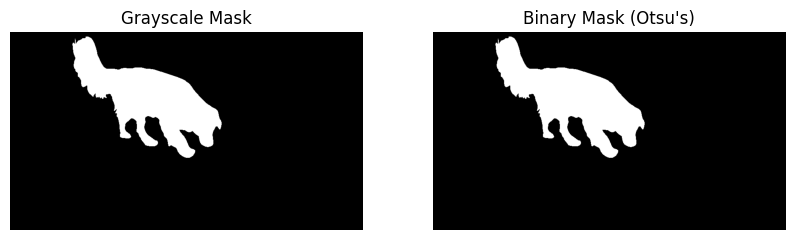

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def convert_to_binary_mask_otsu(grayscale_mask):
    """
    Applies Otsu's thresholding to a grayscale mask to produce a binary mask.
    """
    # Use Otsu's thresholding: the threshold value is automatically determined.
    ret, binary_mask = cv2.threshold(grayscale_mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    print(f"Otsu threshold: {ret}")
    return binary_mask

# Example usage:
mask_path = Path("output/grayscale_single_object_masks/dog/00000.png")
grayscale_mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)
binary_mask = convert_to_binary_mask_otsu(grayscale_mask)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(grayscale_mask, cmap='gray')
plt.title("Grayscale Mask")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(binary_mask, cmap='gray')
plt.title("Binary Mask (Otsu's)")
plt.axis('off')

plt.show()

In [7]:
import cv2
import numpy as np
from pathlib import Path

def convert_to_binary_mask_otsu(grayscale_mask):
    """
    Applies Otsu's thresholding to a grayscale mask to produce a binary mask.
    """
    ret, binary_mask = cv2.threshold(grayscale_mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    print(f"Otsu threshold: {ret}")
    return binary_mask

def process_and_save_binary_mask(input_mask_path, output_mask_path):
    """
    Loads a grayscale mask, converts it to a binary mask using Otsu's method,
    and saves the binary mask to the output path.
    """
    # Load the grayscale mask
    grayscale_mask = cv2.imread(str(input_mask_path), cv2.IMREAD_GRAYSCALE)
    if grayscale_mask is None:
        raise FileNotFoundError(f"Could not load mask from: {input_mask_path}")
    
    # Convert the mask using Otsu's thresholding
    binary_mask = convert_to_binary_mask_otsu(grayscale_mask)
    
    # Ensure the output directory exists
    output_mask_path.parent.mkdir(parents=True, exist_ok=True)
    
    # Save the binary mask
    cv2.imwrite(str(output_mask_path), binary_mask)
    print(f"Saved binary mask to: {output_mask_path}")

def process_all_single_object_masks(input_root, output_root):
    """
    Processes all single-object mask images found under the input_root directory.
    For each sequence folder, it converts each mask image to binary and saves it in the corresponding folder under output_root.
    """
    input_root = Path(input_root)
    output_root = Path(output_root)
    
    for sequence_folder in input_root.iterdir():
        if sequence_folder.is_dir():
            # Create corresponding output folder for this sequence
            sequence_output = output_root / sequence_folder.name
            sequence_output.mkdir(parents=True, exist_ok=True)
            print(f"Processing sequence: {sequence_folder.name}")
            
            # Process each image file in the sequence folder
            for img_file in sequence_folder.iterdir():
                if img_file.suffix.lower() in ['.png', '.jpg', '.jpeg']:
                    output_path = sequence_output / img_file.name
                    process_and_save_binary_mask(img_file, output_path)

if __name__ == "__main__":
    # Input directory containing your grayscale single-object masks
    input_dir = Path("output") / "grayscale_single_object_masks"
    # Output directory where the binary masks will be saved
    output_dir = Path("output") / "binary_single_object_masks"
    
    process_all_single_object_masks(input_dir, output_dir)

Processing sequence: hike
Otsu threshold: 0.0
Saved binary mask to: output/binary_single_object_masks/hike/00052.png
Otsu threshold: 0.0
Saved binary mask to: output/binary_single_object_masks/hike/00046.png
Otsu threshold: 0.0
Saved binary mask to: output/binary_single_object_masks/hike/00047.png
Otsu threshold: 0.0
Saved binary mask to: output/binary_single_object_masks/hike/00053.png
Otsu threshold: 0.0
Saved binary mask to: output/binary_single_object_masks/hike/00045.png
Otsu threshold: 0.0
Saved binary mask to: output/binary_single_object_masks/hike/00051.png
Otsu threshold: 0.0
Saved binary mask to: output/binary_single_object_masks/hike/00079.png
Otsu threshold: 0.0
Saved binary mask to: output/binary_single_object_masks/hike/00078.png
Otsu threshold: 0.0
Saved binary mask to: output/binary_single_object_masks/hike/00050.png
Otsu threshold: 0.0
Saved binary mask to: output/binary_single_object_masks/hike/00044.png
Otsu threshold: 0.0
Saved binary mask to: output/binary_single_o

### STEP 3: Preprocessing the Multi-Object Video Sequences' Frames for Generating Bounding Boxes 

#### ----NEW APPROACH---- PT 1. Deriving Bounding Boxes: Label-to-Colour

In [1]:
import cv2
import numpy as np
import json
from pathlib import Path

def color_mask_to_label_image(mask):
    """
    Converts a color-coded segmentation mask (BGR) into a single-channel label image.
    Each unique color (except background, assumed black) is mapped to a unique integer.
    
    Args:
        mask (np.ndarray): Color-coded mask (BGR).
        
    Returns:
        label_img (np.ndarray): Single-channel label image (dtype=uint16).
        color_to_label (dict): Mapping from each unique color (tuple) to its assigned integer label.
    """
    # Convert BGR to RGB for consistency
    mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    h, w, _ = mask_rgb.shape
    # Reshape to a list of pixels
    pixels = mask_rgb.reshape(-1, 3)
    unique_colors = {tuple(color) for color in np.unique(pixels, axis=0)}
    
    color_to_label = {}
    current_label = 1
    for color in unique_colors:
        if color == (0, 0, 0):  # assume background is black
            color_to_label[color] = 0
        else:
            color_to_label[color] = current_label
            current_label += 1

    label_img = np.zeros((h, w), dtype=np.uint16)
    # Iterate over all pixels (can be vectorized; for clarity we use loops)
    for y in range(h):
        for x in range(w):
            col = tuple(int(c) for c in mask_rgb[y, x])
            label_img[y, x] = color_to_label.get(col, 0)
    return label_img, color_to_label

def process_sequence_labeling(input_seq_folder, output_seq_folder, min_area=50):
    """
    Processes all color-coded segmentation mask images in an input sequence folder,
    converts each to a single-channel label image, and saves them in the output folder.
    
    Args:
        input_seq_folder (str or Path): Folder containing color-coded segmentation masks.
        output_seq_folder (str or Path): Folder where label images will be saved.
        min_area (int): (Optional) Can be used later to filter very small regions when deriving boxes.
    
    Returns:
        index_dict (dict): Dictionary mapping each processed mask filename (relative to the sequence)
                           to a dictionary with keys:
                             - "label_image": path to the saved label image
                             - "color_to_label": the mapping from colors to labels (as a dict)
    """
    input_seq_folder = Path(input_seq_folder)
    output_seq_folder = Path(output_seq_folder)
    output_seq_folder.mkdir(parents=True, exist_ok=True)
    
    index_dict = {}
    
    # Process every file in the input sequence folder
    mask_files = sorted(list(input_seq_folder.glob("*.*")))
    for mask_file in mask_files:
        # Read the color-coded segmentation mask
        mask = cv2.imread(str(mask_file), cv2.IMREAD_COLOR)
        if mask is None:
            print(f"Warning: Could not load mask {mask_file.name}")
            continue
        
        # Convert to label image and get the color-to-label mapping
        label_img, color_to_label = color_mask_to_label_image(mask)
        
        # Optionally, you might add a filtering step based on min_area here when deriving bounding boxes later.
        
        # Save the label image as a 16-bit PNG (to preserve label values)
        # Changed to use the original filename (e.g., "00000.png") instead of "00000_label.png"
        out_filename = mask_file.name
        out_path = output_seq_folder / out_filename
        cv2.imwrite(str(out_path), label_img)
        
        # Record the info in our index dictionary
        index_dict[mask_file.name] = {
            "label_image": str(out_path),
            "color_to_label": color_to_label  # keys will be tuples; JSON will serialize them as lists.
        }
        print(f"Processed {mask_file.name}: saved label image to {out_path}")
    
    return index_dict

def process_all_sequences(input_root, output_root, min_area=50):
    """
    Processes all multi-object segmentation sequences under the input_root folder.
    For each sequence, converts all color-coded masks to label images and saves them.
    
    Args:
        input_root (str or Path): Root folder containing sequence subfolders (e.g., "output/multi_object_annotations").
        output_root (str or Path): Root folder where label images (with same subfolder structure) will be saved.
        min_area (int): Minimum area threshold (passed to process_sequence_labeling).
    
    Returns:
        all_index (dict): Dictionary mapping sequence names to their index dictionaries.
                         Format: { "sequence_name": { "mask_filename": { "label_image": ..., "color_to_label": ... }, ... }, ... }
    """
    input_root = Path(input_root)
    output_root = Path(output_root)
    all_index = {}
    
    for seq_folder in sorted(input_root.iterdir()):
        if not seq_folder.is_dir():
            continue
        seq_name = seq_folder.name
        out_seq_folder = output_root / seq_name
        print(f"Processing sequence: {seq_name}")
        index_dict = process_sequence_labeling(seq_folder, out_seq_folder, min_area=min_area)
        all_index[seq_name] = index_dict
    
    return all_index

# -------------------------
# Main Pipeline: Process and Save Labeling for All Multi-Object Sequences
# -------------------------
if __name__ == "__main__":
    # Input root: folder containing multi-object segmentation masks (color-coded)
    input_root = Path("output/multi_object_annotations")
    # Output root: where the processed label images will be saved
    output_root = Path("output/multi_object_label_masks")
    
    # Process all sequences
    all_sequences_index = process_all_sequences(input_root, output_root, min_area=50)
    
    # Save the aggregated index to a JSON file
    output_json = Path("output") / "multi_object_labeling_index.json"
    # Before dumping, convert any tuple keys (from color mappings) to lists so JSON can serialize them.
    def convert_mapping(mapping):
        return {str(k): v for k, v in mapping.items()}
    
    # We iterate over all sequences and convert the color_to_label mappings.
    for seq in all_sequences_index:
        for mask_name in all_sequences_index[seq]:
            mapping = all_sequences_index[seq][mask_name].get("color_to_label", {})
            all_sequences_index[seq][mask_name]["color_to_label"] = convert_mapping(mapping)
    
    with open(output_json, "w") as f:
        json.dump(all_sequences_index, f, indent=2)
    
    print("Saved labeling index for all multi-object sequences to:", output_json.resolve())

Processing sequence: bike-packing
Processed 00000.png: saved label image to output/multi_object_label_masks/bike-packing/00000.png
Processed 00001.png: saved label image to output/multi_object_label_masks/bike-packing/00001.png
Processed 00002.png: saved label image to output/multi_object_label_masks/bike-packing/00002.png
Processed 00003.png: saved label image to output/multi_object_label_masks/bike-packing/00003.png
Processed 00004.png: saved label image to output/multi_object_label_masks/bike-packing/00004.png
Processed 00005.png: saved label image to output/multi_object_label_masks/bike-packing/00005.png
Processed 00006.png: saved label image to output/multi_object_label_masks/bike-packing/00006.png
Processed 00007.png: saved label image to output/multi_object_label_masks/bike-packing/00007.png
Processed 00008.png: saved label image to output/multi_object_label_masks/bike-packing/00008.png
Processed 00009.png: saved label image to output/multi_object_label_masks/bike-packing/00009.